## Clustering

We use a simple k-means algorithm to demonstrate how clustering can be done. Clustering can help discover valuable, hidden groupings within the data. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

In [32]:
# imports
import numpy as np
import pandas as pd
from ast import literal_eval
# load data
datafile_path = "../2-Data/dialogues_embededd.pkl"
df = pd.read_pickle(datafile_path)

In [33]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...,Description: Q. What does abutment of the nerv...,58,"[-0.1678172, 0.25504777, 0.32995197, -0.019847..."
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...,Description: Q. What should I do to reduce my ...,173,"[-0.20603478, 0.1933242, 0.13318594, 0.0191498..."
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...,Description: Q. I have started to get lots of ...,174,"[-0.29600272, 0.13250932, -0.12288458, 0.32883..."
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...,Description: Q. Why do I have uncomfortable fe...,189,"[-0.13440488, -0.18298218, -0.12564877, -0.101..."
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...,Description: Q. My symptoms after intercourse ...,295,"[-0.06823079, 0.23422238, 0.04620348, -0.27123..."
...,...,...,...,...,...,...
95,Q. I masturbate only by rubbing the tip of the...,"Hi doctor, During masturbation I just rub the ...",Hi. For further doubts consult a sexologist on...,Description: Q. I masturbate only by rubbing t...,109,"[0.07959657, 0.07461737, 0.17961462, -0.272259..."
96,Q. What causes respiratory problem in a 36-yea...,"Hello doctor, My mother is 36 years old, and s...",Hello. I have read through your question and w...,Description: Q. What causes respiratory proble...,61,"[0.11203569, 0.3589625, -0.09634888, 0.304797,..."
97,"Q. During orthodontic treatment, when will the...","Hello doctor, Today is my fourth day of braces...",Hello. Blue fillings or bites are removed when...,"Description: Q. During orthodontic treatment, ...",107,"[-0.3829618, -0.12643884, 0.26996905, -0.24681..."
98,Q. Current dose of Synthyroid is 150 mg. What ...,"Hello doctor,My 24 years old daughter born wit...",Hello. It is better to increase the dose by 25...,Description: Q. Current dose of Synthyroid is ...,147,"[-0.16212168, 0.08990885, 0.07472578, 0.052107..."


In [34]:

#df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)  # convert string to numpy array
df["embedding"] = df.embedding.apply(np.array)  # convert string to numpy array
matrix = np.vstack(df.embedding.values)
matrix.shape


(100, 384)

In [35]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...,Description: Q. What does abutment of the nerv...,58,"[-0.1678172, 0.25504777, 0.32995197, -0.019847..."
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...,Description: Q. What should I do to reduce my ...,173,"[-0.20603478, 0.1933242, 0.13318594, 0.0191498..."
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...,Description: Q. I have started to get lots of ...,174,"[-0.29600272, 0.13250932, -0.12288458, 0.32883..."
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...,Description: Q. Why do I have uncomfortable fe...,189,"[-0.13440488, -0.18298218, -0.12564877, -0.101..."
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...,Description: Q. My symptoms after intercourse ...,295,"[-0.06823079, 0.23422238, 0.04620348, -0.27123..."
...,...,...,...,...,...,...
95,Q. I masturbate only by rubbing the tip of the...,"Hi doctor, During masturbation I just rub the ...",Hi. For further doubts consult a sexologist on...,Description: Q. I masturbate only by rubbing t...,109,"[0.07959657, 0.07461737, 0.17961462, -0.272259..."
96,Q. What causes respiratory problem in a 36-yea...,"Hello doctor, My mother is 36 years old, and s...",Hello. I have read through your question and w...,Description: Q. What causes respiratory proble...,61,"[0.11203569, 0.3589625, -0.09634888, 0.304797,..."
97,"Q. During orthodontic treatment, when will the...","Hello doctor, Today is my fourth day of braces...",Hello. Blue fillings or bites are removed when...,"Description: Q. During orthodontic treatment, ...",107,"[-0.3829618, -0.12643884, 0.26996905, -0.24681..."
98,Q. Current dose of Synthyroid is 150 mg. What ...,"Hello doctor,My 24 years old daughter born wit...",Hello. It is better to increase the dose by 25...,Description: Q. Current dose of Synthyroid is ...,147,"[-0.16212168, 0.08990885, 0.07472578, 0.052107..."


### 1. Find the clusters using K-means

We show the simplest use of K-means. You can pick the number of clusters that fits your use case best.

In [40]:
from sklearn.cluster import KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

C:\gpt\my_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding,Cluster
0,Q. What does abutment of the nerve root mean?,"Hi doctor,I am just wondering what is abutting...",Hi. I have gone through your query with dilige...,Description: Q. What does abutment of the nerv...,58,"[-0.1678172, 0.25504777, 0.32995197, -0.019847...",1
1,Q. What should I do to reduce my weight gained...,"Hi doctor, I am a 22-year-old female who was d...",Hi. You have really done well with the hypothy...,Description: Q. What should I do to reduce my ...,173,"[-0.20603478, 0.1933242, 0.13318594, 0.0191498...",2
2,Q. I have started to get lots of acne on my fa...,Hi doctor! I used to have clear skin but since...,Hi there Acne has multifactorial etiology. Onl...,Description: Q. I have started to get lots of ...,174,"[-0.29600272, 0.13250932, -0.12288458, 0.32883...",2
3,Q. Why do I have uncomfortable feeling between...,"Hello doctor,I am having an uncomfortable feel...",Hello. The popping and discomfort what you fel...,Description: Q. Why do I have uncomfortable fe...,189,"[-0.13440488, -0.18298218, -0.12564877, -0.101...",2
4,Q. My symptoms after intercourse threatns me e...,"Hello doctor,Before two years had sex with a c...",Hello. The HIV test uses a finger prick blood ...,Description: Q. My symptoms after intercourse ...,295,"[-0.06823079, 0.23422238, 0.04620348, -0.27123...",4
...,...,...,...,...,...,...,...
95,Q. I masturbate only by rubbing the tip of the...,"Hi doctor, During masturbation I just rub the ...",Hi. For further doubts consult a sexologist on...,Description: Q. I masturbate only by rubbing t...,109,"[0.07959657, 0.07461737, 0.17961462, -0.272259...",4
96,Q. What causes respiratory problem in a 36-yea...,"Hello doctor, My mother is 36 years old, and s...",Hello. I have read through your question and w...,Description: Q. What causes respiratory proble...,61,"[0.11203569, 0.3589625, -0.09634888, 0.304797,...",2
97,"Q. During orthodontic treatment, when will the...","Hello doctor, Today is my fourth day of braces...",Hello. Blue fillings or bites are removed when...,"Description: Q. During orthodontic treatment, ...",107,"[-0.3829618, -0.12643884, 0.26996905, -0.24681...",1
98,Q. Current dose of Synthyroid is 150 mg. What ...,"Hello doctor,My 24 years old daughter born wit...",Hello. It is better to increase the dose by 25...,Description: Q. Current dose of Synthyroid is ...,147,"[-0.16212168, 0.08990885, 0.07472578, 0.052107...",2


In [42]:
#df.groupby(['Cluster'])['Score'].mean()


In [43]:
#df.groupby("Cluster").Score.mean().sort_values()

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

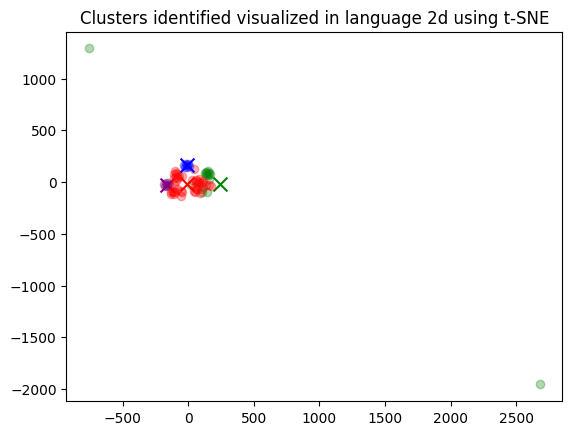

In [44]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")


Visualization of clusters in a 2d projection. In this run, the green cluster (#1) seems quite different from the others. Let's see a few samples from each cluster.

### 2. Text samples in the clusters & naming the clusters

Let's show random samples from each cluster. We'll use text-davinci-003 to name the clusters, based on a random sample of 5 reviews from that cluster.

In [45]:
import openai

# Reading a review which belong to each group.
rev_per_cluster = 5

for i in range(n_clusters):
    print(f"Cluster {i} Theme:", end=" ")

    reviews = "\n".join(
        df[df.Cluster == i]
        .combined.str.replace("Title: ", "")
        .str.replace("\n\nContent: ", ":  ")
        .sample(rev_per_cluster, random_state=42)
        .values
    )
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f'What do the following customer reviews have in common?\n\nCustomer reviews:\n"""\n{reviews}\n"""\n\nTheme:',
        temperature=0,
        max_tokens=64,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response["choices"][0]["text"].replace("\n", ""))

    sample_cluster_rows = df[df.Cluster == i].sample(rev_per_cluster, random_state=42)
    for j in range(rev_per_cluster):
        print(sample_cluster_rows.Score.values[j], end=", ")
        print(sample_cluster_rows.Summary.values[j], end=":   ")
        print(sample_cluster_rows.Text.str[:70].values[j])

    print("-" * 100)


Cluster 0 Theme: 

AuthenticationError: No API key provided. You can set your API key in code using 'openai.api_key = <API-KEY>', or you can set the environment variable OPENAI_API_KEY=<API-KEY>). If your API key is stored in a file, you can point the openai module at it with 'openai.api_key_path = <PATH>'. You can generate API keys in the OpenAI web interface. See https://platform.openai.com/account/api-keys for details.

It's important to note that clusters will not necessarily match what you intend to use them for. A larger amount of clusters will focus on more specific patterns, whereas a small number of clusters will usually focus on largest discrepencies in the data.